In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

dataSP500 = pd.read_csv('./CSV/df_sp500.csv')

# Check the first few rows of the data
dataSP500.head()

,Date,Close,High,Low,Open,Volume
0,2020-02-12,3379.449951,3381.469971,3369.719971,3370.500000,3930910000
1,2020-02-13,3373.939941,3385.090088,3360.520020,3365.899902,3500890000
2,2020-02-14,3380.159912,3380.689941,3366.149902,3378.080078,3419700000
3,2020-02-18,3370.290039,3375.010010,3355.610107,3369.040039,3750400000
4,2020-02-19,3386.149902,3393.520020,3378.830078,3380.389893,3614200000


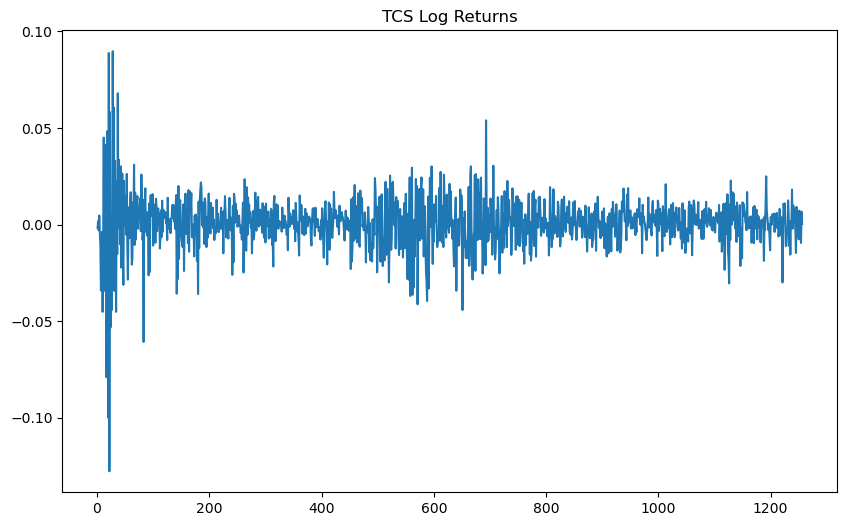

In [10]:
# Calculate daily log returns
dataSP500['Log_Returns'] = np.log(dataSP500['Close'] / dataSP500['Close'].shift(1))

# Drop missing values (first row will be NaN due to shift)
dataSP500 = dataSP500.dropna()

# Plot log returns to visualize the data
dataSP500['Log_Returns'].plot(title='TCS Log Returns', figsize=(10, 6))
plt.show()

In [11]:
# Define the EGARCH model (1,1)
model = arch_model(dataSP500['Log_Returns'], vol='EGARCH', p=1, q=1)

# Fit the model
egarch_fit = model.fit(disp='off')

# Print the model summary
print(egarch_fit.summary())

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                3949.83
Distribution:                  Normal   AIC:                          -7891.66
Method:            Maximum Likelihood   BIC:                          -7871.11
                                        No. Observations:                 1256
Date:                Wed, Feb 12 2025   Df Residuals:                     1255
Time:                        12:02:10   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         7.2682e-04  4.351e-04      1.671  9.480e-02 

/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [13]:
# Forecast volatility for the next 30 days
forecast_horizon = 30
volatility_forecast = egarch_fit.forecast(horizon=forecast_horizon,method="bootstrap")

# Extract the forecasted volatility (standard deviation) from the model
forecasted_volatility = np.sqrt(volatility_forecast.variance.values[-1, :])

# Display the forecasted volatility
print("Forecasted Volatility for the next 30 days:")
print(forecasted_volatility)

Forecasted Volatility for the next 30 days:
[0.0084307  0.00853123 0.00857993 0.00866981 0.00874577 0.00882401
 0.0088486  0.00891403 0.00896783 0.00900941 0.00909515 0.0091553
 0.00919689 0.00922973 0.00926958 0.00934924 0.00939004 0.00943345
 0.00948546 0.00951553 0.00959987 0.00958127 0.00958045 0.00963221
 0.0097098  0.00976971 0.0097894  0.00983821 0.00986165 0.00990479]


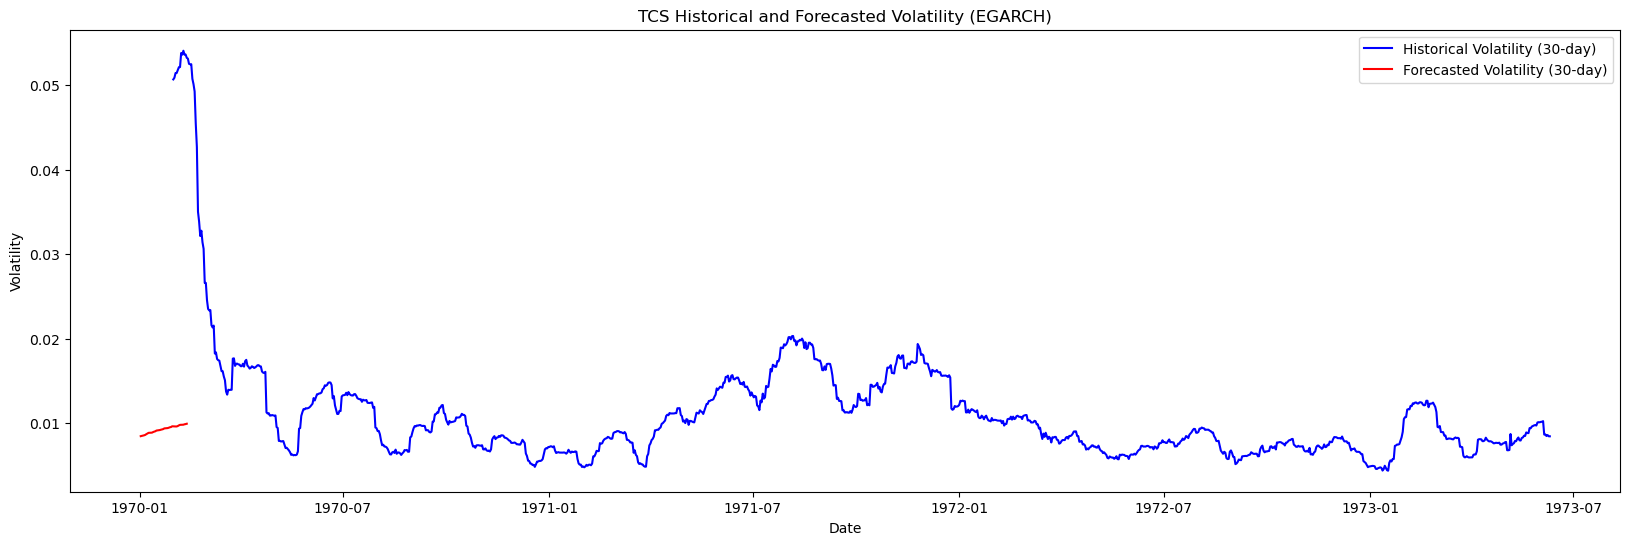

In [15]:
# Plot the historical and forecasted volatility
plt.figure(figsize=(20, 6))

# Historical volatility (rolling 30-day standard deviation of log returns)
historical_volatility = dataSP500['Log_Returns'].rolling(window=30).std()

# Plot historical volatility
plt.plot(historical_volatility, label='Historical Volatility (30-day)', color='blue')

# Plot forecasted volatility (append to the end of historical data)
future_dates = pd.date_range(dataSP500.index[-1], periods=forecast_horizon+1, freq='B')[1:]
forecast_volatility_series = pd.Series(forecasted_volatility, index=future_dates)

# Plot forecasted volatility
plt.plot(forecast_volatility_series, label='Forecasted Volatility (30-day)', color='red')

# Add labels and legend
plt.title('TCS Historical and Forecasted Volatility (EGARCH)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()